In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Алгоритм Нуссинов 

In [2]:
def nussinov_algorithm(rna, min_loop_size=3):
    n = len(rna)
    dp = np.zeros((n, n))
    
    for diff in range(min_loop_size + 1, n):
        for i in range(0, n - diff):
            j = i + diff
            
            max_middle = 0
            for k in range(i + 1, j):
                max_middle = max(dp[i, k] + dp[k + 1, j], max_middle)
                
            eps = 1 if paired(rna[i], rna[j]) else 0
            dp[i, j] = max(dp[i + 1, j], 
                           dp[i, j - 1], 
                           eps * (dp[i + 1, j - 1] + 1), 
                           max_middle)
            
    show_rna_structure(rna, dp, min_loop_size)
            
    return dp

In [3]:
def paired(nt1, nt2):
    if (nt1, nt2) in [("C", "G"), ("G", "C"), ("A", "U"), ("U", "A")]:
        return True
    else:
        return False

In [4]:
def show_rna_structure(rna, dp, min_loop_size):
    n = len(rna)
    alpha = 2 * np.pi / n
    r = n / 10
    dots = np.asarray([(r * np.cos(i * alpha), r * np.sin(i * alpha)) for i in range(n)])
    pairs = find_pairs(0, n - 1, rna, dp, min_loop_size)
    
    sns.set_style("white")
    
    plt.figure(figsize=(7,7))
    
    for i in range(n):
        text_coords = [(r + r/10) * np.cos(i * alpha), (r + r/10) * np.sin(i * alpha)]
        plt.annotate(i + 1, dots[i], text_coords)
    
    c = plt.Circle((0, 0), r, color='b', fill=False, linewidth=1)
    plt.gca().add_patch(c)
    
    plt.scatter(dots[:, 0], dots[:, 1])
    
    for p in pairs:
        i = p[0]
        j = p[1]
        plt.plot([dots[i][0], dots[j][0]], [dots[i][1], dots[j][1]], 'ro-')
        
    sns.despine()
    plt.show()

In [5]:
def find_pairs(i, j, rna, dp, min_loop_size):
    pairs = []
    while i < j and j - i >= min_loop_size + 1:
        if dp[i, j] == dp[i + 1, j]:
            i += 1
        elif dp[i, j] == dp[i, j - 1]:
            j -= 1
        elif paired(rna[i], rna[j]) and dp[i, j] == dp[i + 1, j - 1] + 1:
            pairs.append([i, j])
            i += 1
            j -= 1
        else:
            for k in range(i + 1, j - 1):
                if dp[i, j] == dp[i, k] + dp[k + 1, j]:
                    return pairs + find_pairs(i, k, rna, dp, min_loop_size) \
                         + find_pairs(k + 1, j, rna, dp, min_loop_size)
                
    return pairs

# Тесты 1-2

In [6]:
def test1():
    nussinov_algorithm("GGACC")

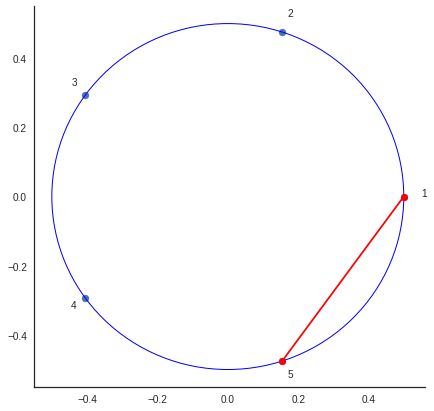

In [7]:
test1()

In [8]:
def test2():
    nussinov_algorithm("AAACAUGAGGAUUACCCAUGU")

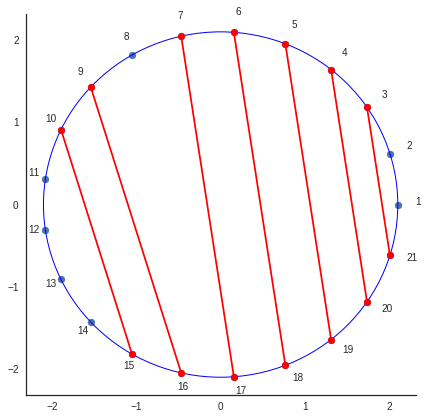

In [9]:
test2()